In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
sub=pd.read_csv("/content/sample_submission_O1oDc4H.csv")

In [ ]:
train=pd.read_csv("/content/train_yaOffsB.csv")

In [ ]:
test=pd.read_csv("/content/test_pFkWwen.csv")

In [ ]:
test = test.set_index('ID')
test = test.reindex(index=sub['ID'])
test= test.reset_index()

In [ ]:
train

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0


In [ ]:
yy=train.loc[train['Crop_Damage'] == 2]

In [ ]:
yy

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
7,F00000010,577,1,0,1,0,0.0,0,1,2
9,F00000020,1132,1,0,1,0,0.0,0,1,2
14,F00000029,1575,1,1,1,0,0.0,0,2,2
103,F00000193,625,0,1,3,30,29.0,0,1,2
112,F00000217,732,0,0,3,50,30.0,0,2,2
...,...,...,...,...,...,...,...,...,...,...
88470,F00155221,3165,0,1,2,40,40.0,18,1,2
88479,F00155242,3516,0,1,2,25,50.0,4,3,2
88493,F00155265,3896,0,1,2,60,48.0,10,1,2
88552,F00155357,448,1,0,2,20,20.0,11,2,2


In [ ]:
xx=train.loc[train['Crop_Damage'] == 1]

In [ ]:
xx

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
5,F00000008,448,0,1,1,0,NaN,0,2,1
...,...,...,...,...,...,...,...,...,...,...
88824,F00155881,2401,1,0,2,20,51.0,3,1,1
88830,F00155896,2541,1,0,2,20,35.0,12,1,1
88831,F00155897,2541,1,0,2,10,11.0,26,1,1
88837,F00155905,2688,1,0,2,25,40.0,12,2,1


In [ ]:
all=pd.concat([train,test]).sort_values("ID")

In [ ]:
all[8000:8050]

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
4778,F00008386,448,1,0,2,20,14.0,16,2,0.0
2245,F00008387,448,1,0,2,20,15.0,13,2,NaN
4779,F00008388,448,1,0,2,20,24.0,8,2,0.0
2246,F00008389,448,1,0,2,20,31.0,0,1,NaN
4780,F00008390,448,1,0,2,30,19.0,12,1,0.0
2247,F00008391,448,1,0,2,40,16.0,12,3,NaN
42418,F00008392,448,1,0,2,40,19.0,11,2,NaN
4781,F00008393,448,1,0,2,40,25.0,7,2,0.0
2248,F00008394,488,1,0,2,5,10.0,17,1,NaN
4782,F00008395,488,1,0,2,5,17.0,10,1,0.0


In [ ]:
train.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.088830,-0.056375,-0.079904,-0.102461,0.434925,0.299279,0.002304,0.202888
Crop_Type,-0.088830,1.000000,-0.287372,0.235779,-0.192161,-0.043991,-0.233394,0.002161,-0.016495
Soil_Type,-0.056375,-0.287372,1.000000,0.032657,0.079447,-0.070051,0.009364,0.002327,-0.021997
Pesticide_Use_Category,-0.079904,0.235779,0.032657,1.000000,-0.003498,0.344131,-0.554169,0.002811,0.175002
Number_Doses_Week,-0.102461,-0.192161,0.079447,-0.003498,1.000000,0.126426,-0.037131,-0.001401,-0.030874
Number_Weeks_Used,0.434925,-0.043991,-0.070051,0.344131,0.126426,1.000000,-0.449007,0.004417,0.232192
Number_Weeks_Quit,0.299279,-0.233394,0.009364,-0.554169,-0.037131,-0.449007,1.000000,0.000595,-0.133117
Season,0.002304,0.002161,0.002327,0.002811,-0.001401,0.004417,0.000595,1.000000,-0.000184
Crop_Damage,0.202888,-0.016495,-0.021997,0.175002,-0.030874,0.232192,-0.133117,-0.000184,1.000000


In [ ]:
train.isnull().sum()/len(train)

ID                         0.000000
Estimated_Insects_Count    0.000000
Crop_Type                  0.000000
Soil_Type                  0.000000
Pesticide_Use_Category     0.000000
Number_Doses_Week          0.000000
Number_Weeks_Used          0.101285
Number_Weeks_Quit          0.000000
Season                     0.000000
Crop_Damage                0.000000
dtype: float64

In [ ]:
train.Number_Weeks_Used=train.Number_Weeks_Used.fillna(train.Number_Weeks_Used.median())

In [ ]:
train.drop(["ID",],axis=1,inplace=True)

In [ ]:
test.drop(["ID"],axis=1,inplace=True)

In [ ]:
test.Number_Weeks_Used=test.Number_Weeks_Used.fillna(test.Number_Weeks_Used.median())

In [ ]:
y=train.pop("Crop_Damage")

# BASELINE

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from lightgbm import LGBMClassifier
lgb=LGBMClassifier()
scores = cross_val_score(lgb, train,y, cv = 5, scoring = "accuracy")
scores.mean()

0.8412410797619293

In [ ]:
from lightgbm import LGBMClassifier
lgb=LGBMClassifier(num_leaves=21,n_estimators=300,max_depth=13)
scores = cross_val_score(lgb, train,y, cv = 5, scoring = "accuracy")
scores.mean()

0.8468005055894474

In [ ]:
lgb=LGBMClassifier(max_depth=11)
lgb.fit(train,y)
pred=lgb.predict(test)
sub["Crop_Damage"]=pred
sub.to_csv("new10.csv",index=False)

In [ ]:
data=pd.concat([train,test],ignore_index=True)

In [ ]:
data

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Soil_type_enc,Pesticide_Use_Category_enc,Season_enc,Crop_type_enc,No. if Doses,Number_Months_Used,Number_Months_Quit
0,13.711309,1,0,1,0,0.0,0,1,0.199755,1.056153,0.188462,0.178677,0.0,0.00,0.00
1,14.456832,1,0,1,0,0.0,0,2,0.199755,1.056153,0.193237,0.178677,0.0,0.00,0.00
2,16.031220,1,0,1,0,0.0,0,2,0.199755,1.056153,0.193237,0.178677,0.0,0.00,0.00
3,16.031220,1,1,1,0,0.0,0,2,0.179702,1.056153,0.193237,0.178677,0.0,0.00,0.00
4,18.493242,1,0,1,0,0.0,0,2,0.199755,1.056153,0.193237,0.178677,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148163,51.845926,1,0,2,10,30.0,14,2,0.199755,0.116624,0.193237,0.178677,300.0,7.50,3.50
148164,53.291650,1,0,2,20,51.0,5,3,0.199755,0.116624,0.187084,0.178677,1020.0,12.75,1.25
148165,56.249444,1,0,2,20,46.0,11,2,0.199755,0.116624,0.193237,0.178677,920.0,11.50,2.75
148166,57.758116,1,0,2,5,10.0,31,1,0.199755,0.116624,0.188462,0.178677,50.0,2.50,7.75


# VISUALIZATION

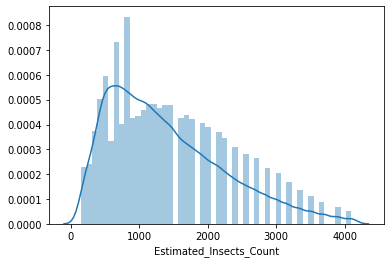

In [ ]:
sns.distplot(data.Estimated_Insects_Count)

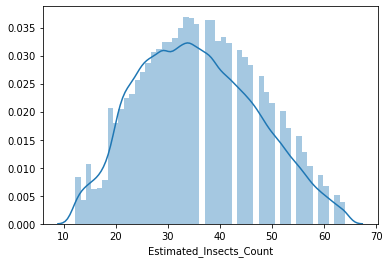

In [ ]:
sns.distplot(np.sqrt(data.Estimated_Insects_Count))

In [ ]:
data.Estimated_Insects_Count=np.sqrt(data.Estimated_Insects_Count)

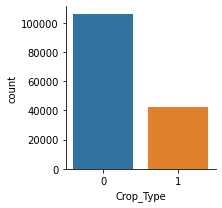

In [ ]:
sns.catplot(x='Crop_Type',data=data,kind='count',height=3,aspect=1)

In [ ]:

Mean_encoded_subject = train.groupby(['Crop_Type'])['Crop_Damage'].mean().to_dict()

In [ ]:
data['Crop_type_enc'] =  data['Crop_Type'].map(Mean_encoded_subject) 

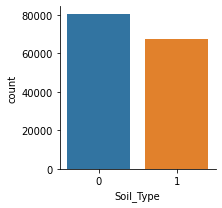

In [ ]:
sns.catplot(x='Soil_Type',data=data,kind='count',height=3,aspect=1)

In [ ]:
train=pd.read_csv("/content/train_yaOffsB.csv")

In [ ]:
Mean_encoded_subject = train.groupby(['Soil_Type'])['Crop_Damage'].mean().to_dict()

In [ ]:
data['Soil_type_enc'] =  data['Soil_Type'].map(Mean_encoded_subject) 

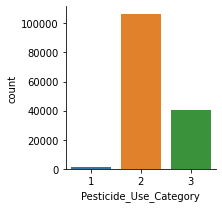

In [ ]:
sns.catplot(x='Pesticide_Use_Category',data=data,kind='count',height=3,aspect=1)

In [ ]:
Mean_encoded_subject = train.groupby(['Pesticide_Use_Category'])['Crop_Damage'].mean().to_dict()

In [ ]:
data['Pesticide_Use_Category_enc'] =  data['Pesticide_Use_Category'].map(Mean_encoded_subject) 

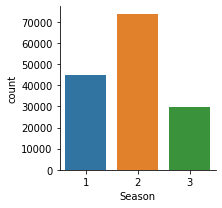

In [ ]:
sns.catplot(x='Season',data=data,kind='count',height=3,aspect=1)

In [ ]:
Mean_encoded_subject = train.groupby(['Season'])['Crop_Damage'].mean().to_dict()

In [ ]:
data['Season_enc'] =  data['Season'].map(Mean_encoded_subject) 

In [ ]:
trainxx=data[:88858]
testxx=data[88858:]

In [ ]:
from lightgbm import LGBMClassifier
lg=LGBMClassifier()
scores = cross_val_score(lg, trainxx,y, cv = 5, scoring = "accuracy")
scores.mean()

# FEATURE_ENGINEERING

In [ ]:
data["No. if Doses"]=data["Number_Doses_Week"]*data["Number_Weeks_Used"]

In [ ]:
diff=data["Number_Weeks_Used"]-data["Number_Weeks_Quit"]

In [ ]:
d=[]
for i in diff:
  if(i<0):
    d.append(0)
  else:
    d.append(1)

In [ ]:
data["diff_week"]=d

In [ ]:
data["Number_Months_Used"]=data.Number_Weeks_Used/4

In [ ]:
data["Number_Months_Quit"]=(data.Number_Weeks_Quit)/4

In [ ]:
data["Number_ss_used"]=data.Number_Weeks_Used/6

In [ ]:
data["Number_ss_quit"]=data.Number_Weeks_Quit/6

In [ ]:
data["Number_sss_used"]=data.Number_Weeks_Used/8

In [ ]:
data["Number_sss_quit"]=data.Number_Weeks_Quit/8

In [ ]:
season=pd.get_dummies(data.Season)

In [ ]:
data["sum_weeks"]=data["Number_Weeks_Used"]+data["Number_Weeks_Quit"]

In [ ]:
data["sum_days"]=data["sum_weeks"]*7

In [ ]:
data["rr"]=data["Soil_Type"]*data["Crop_Type"]

In [ ]:
data["ss"]=data["Pesticide_Use_Category"]*data["Crop_Type"]

In [ ]:
data.drop("ss",axis=1,inplace=True)

In [ ]:
trainxx=data[:88858]
testxx=data[88858:]

In [ ]:
trainxx.head(2)

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Soil_type_enc,Pesticide_Use_Category_enc,Season_enc,Crop_type_enc,No. if Doses,Number_Months_Used,Number_Months_Quit,Number_ss_used,Number_ss_quit,Number_sss_quit,Number_sss_used,sum_weeks,sum_days,rr,ss
0,13.711309,1,0,1,0,0.0,0,1,0.199755,1.056153,0.188462,0.178677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1,14.456832,1,0,1,0,0.0,0,2,0.199755,1.056153,0.193237,0.178677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


# TRIAL

In [ ]:
lgt=LGBMClassifier(n_estimators=800)
scores = cross_val_score(lgt, trainxx,y, cv = 5, scoring = "accuracy")
scores.mean()

0.8434806038201794

In [ ]:
0.8469693155171047

In [ ]:
lgt.fit(trainxx,y)
pred=lgt.predict(testxx)
sub["Crop_Damage"]=pred
sub.to_csv("new7.csv",index=False)

In [ ]:
data.drop(["Season","Crop_Type","Soil_Type","Pesticide_Use_Category"],axis=1,inplace=True)

In [ ]:
trainxx=data[:88858]
testxx=data[88858:]

In [ ]:
lg=LGBMClassifier(n_estimators=200,max_depth=6)
scores = cross_val_score(lg, trainxx,y, cv = 5, scoring = "accuracy")
scores.mean()

0.8471493721363444

In [ ]:
0.847149

In [ ]:
lg.importance()

In [ ]:
lg.fit(trainxx,y)
pred=lg.predict(testxx)
sub["Crop_Damage"]=pred
sub.to_csv("new5.csv",index=False)

In [ ]:
from lightgbm import LGBMClassifier
xgb=LGBMClassifier()
scores = cross_val_score(xgb, train,y, cv = 5, scoring = "accuracy")
scores.mean()

0.8464966517725261

In [ ]:

xgb.fit(trainxx,y)
pred=xgb.predict(testxx)
sub["Crop_Damage"]=pred
sub.to_csv("new1.csv",index=False)

In [ ]:
sub

,ID,Crop_Damage
0,F00000002,1
1,F00000011,1
2,F00000014,1
3,F00000015,1
4,F00000016,1
...,...,...
59305,F00155901,0
59306,F00155912,0
59307,F00155930,0
59308,F00155933,0


In [ ]:
sub["Crop_Damage"]=np.argmax(model.predict(testxx),axis=1)
sub.to_csv("new888.csv",index=False)

In [ ]:
pip install catboost

     |████████████████████████████████| 64.8MB 57kB/s 


In [ ]:
from catboost import CatBoostClassifier
xgb=CatBoostClassifier(max_depth=7)
scores = cross_val_score(xgb, trainxx,y, cv = 3, scoring = "accuracy")
scores.mean()

Learning rate set to 0.097437
0:	learn: 0.9833853	total: 56ms	remaining: 55.9s
1:	learn: 0.8956229	total: 106ms	remaining: 52.9s
2:	learn: 0.8269348	total: 162ms	remaining: 53.9s
3:	learn: 0.7703411	total: 209ms	remaining: 52.1s
4:	learn: 0.7235415	total: 252ms	remaining: 50.2s
5:	learn: 0.6843531	total: 297ms	remaining: 49.2s
6:	learn: 0.6517718	total: 341ms	remaining: 48.3s
7:	learn: 0.6239842	total: 388ms	remaining: 48.1s
8:	learn: 0.6000348	total: 435ms	remaining: 48s
9:	learn: 0.5794337	total: 482ms	remaining: 47.7s
10:	learn: 0.5615704	total: 535ms	remaining: 48.1s
11:	learn: 0.5461311	total: 580ms	remaining: 47.7s
12:	learn: 0.5324757	total: 627ms	remaining: 47.6s
13:	learn: 0.5212203	total: 677ms	remaining: 47.7s
14:	learn: 0.5107373	total: 726ms	remaining: 47.7s
15:	learn: 0.5015374	total: 778ms	remaining: 47.8s
16:	learn: 0.4941090	total: 820ms	remaining: 47.4s
17:	learn: 0.4874749	total: 863ms	remaining: 47.1s
18:	learn: 0.4816752	total: 911ms	remaining: 47s
19:	learn: 0.475

0.844741034683127